We first import the required modules

In [18]:
import numpy as np
import matplotlib.pyplot as pl
import datetime as dt
import textwrap as tw

We create empty arrays to store values

In [19]:
obs=[]
obsstd=[]
year=[]

We read the data

In [20]:
fobs = open('./DATA/co2_brw_surface_1980_2005.txt','r')

We extract the CO2 values

In [21]:
for w in fobs.readlines():
    crawler=w.strip()
    pre = crawler.split(" ")
    year.append(str(pre[1])+"-"+str(pre[2])+"-"+str(pre[3]))
    obs.append(np.float(pre[7]))
    obsstd.append(np.float(pre[8]))
fobs.close()

We calculate some stuff

In [22]:
obsmax=[x + y for x, y in zip(obs, obsstd)]
obsmin=[x - y for x, y in zip(obs, obsstd)]

thedate = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in year]

And we create the scatter plot between the x and y data. 

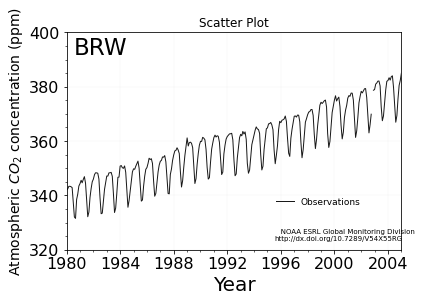

In [24]:
fig, ax = pl.subplots(1,1)
ax.plot(thedate[0:301],obs[0:301],color='black',linewidth=1, alpha=0.9, label='Observations')

ax.minorticks_on()
ax.tick_params(axis='y',which='minor',bottom='off')
ax.tick_params(axis='x',which='minor',bottom='off')

ax.grid(linestyle='dotted',linewidth=.2, alpha=0.8)
ax.legend(fontsize=9,frameon=False,loc="upper left", bbox_to_anchor=(0.6,0.28))

comment1_txt = '''\
   NOAA ESRL Global Monitoring Division
http://dx.doi.org/10.7289/V54X55RG
    '''
annot_txt = tw.fill(tw.dedent(comment1_txt.rstrip()), width=40)
ax.text(.62, .05, annot_txt, horizontalalignment='left', rotation=0, wrap=True, bbox={'facecolor':'none', 'alpha':0.0, 'pad':2},
        transform=ax.transAxes, fontsize=7)
ax.text(.02,.9,'BRW',fontsize=23,
        horizontalalignment='left',
        transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(linestyle='dotted',linewidth=.2, alpha=0.8)    
ax.set_xlabel('Year', fontsize=20,linespacing=4.2)
ax.set_ylabel('Atmospheric $CO_2$ concentration (ppm)', fontsize=14)
ax.set_ylim(320,400,10)
datemin=thedate[0]
datemax=thedate[300]
ax.set_xlim(datemin, datemax)
pl.title('Scatter Plot')
pl.show() 